#### Hensman 2013 (http://www.auai.org/uai2013/prints/papers/244.pdf) they chose to include into our model 8 of the many variables available for this dataset: the age of the aircraft (number of years since deployment), distance that needs to be covered, airtime, departure time, arrival time, day of the week, day of the month and month

#### This notebook will duplicate the appropriate priedictors for comparison.

In [1]:
import bz2
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime
import predictors as p

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import os
print(os.getcwd())

/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


/Users/omarchavez/UT/communal_monte_carlo


In [2]:
import math
def get_hour(x):
    return int(math.floor(x / 100.0))

def get_items_greater_than_cut(series, cut=50):
    counts = series.value_counts()
    index = counts.index.values[counts >= cut]
    return(list(index))

def get_dep_arr_time_buckets(X):
    X_CRS_DEP_ARR_TIME = pd.DataFrame(
        {
            'CRS_DEP_TIME_BLK_0600-0659':((X.CRS_DEP_TIME >=  600) & (X.CRS_DEP_TIME <=  659)).apply(int),
            'CRS_DEP_TIME_BLK_0700-0759':((X.CRS_DEP_TIME >=  700) & (X.CRS_DEP_TIME <=  759)).apply(int),
            'CRS_DEP_TIME_BLK_0800-0859':((X.CRS_DEP_TIME >=  800) & (X.CRS_DEP_TIME <=  859)).apply(int),
            'CRS_DEP_TIME_BLK_0900-0959':((X.CRS_DEP_TIME >=  900) & (X.CRS_DEP_TIME <=  959)).apply(int),
            'CRS_DEP_TIME_BLK_1000-1059':((X.CRS_DEP_TIME >= 1000) & (X.CRS_DEP_TIME <= 1059)).apply(int),
            'CRS_DEP_TIME_BLK_1100-1159':((X.CRS_DEP_TIME >= 1100) & (X.CRS_DEP_TIME <= 1159)).apply(int),
            'CRS_DEP_TIME_BLK_1200-1259':((X.CRS_DEP_TIME >= 1200) & (X.CRS_DEP_TIME <= 1259)).apply(int),
            'CRS_DEP_TIME_BLK_1300-1359':((X.CRS_DEP_TIME >= 1300) & (X.CRS_DEP_TIME <= 1359)).apply(int),
            'CRS_DEP_TIME_BLK_1400-1459':((X.CRS_DEP_TIME >= 1400) & (X.CRS_DEP_TIME <= 1459)).apply(int),
            'CRS_DEP_TIME_BLK_1500-1559':((X.CRS_DEP_TIME >= 1500) & (X.CRS_DEP_TIME <= 1559)).apply(int),
            'CRS_DEP_TIME_BLK_1600-1659':((X.CRS_DEP_TIME >= 1600) & (X.CRS_DEP_TIME <= 1659)).apply(int),
            'CRS_DEP_TIME_BLK_1700-1759':((X.CRS_DEP_TIME >= 1700) & (X.CRS_DEP_TIME <= 1759)).apply(int),
            'CRS_DEP_TIME_BLK_1800-1859':((X.CRS_DEP_TIME >= 1800) & (X.CRS_DEP_TIME <= 1859)).apply(int),
            'CRS_DEP_TIME_BLK_1900-1959':((X.CRS_DEP_TIME >= 1900) & (X.CRS_DEP_TIME <= 1959)).apply(int),
            'CRS_DEP_TIME_BLK_2000-2059':((X.CRS_DEP_TIME >= 2000) & (X.CRS_DEP_TIME <= 2059)).apply(int),
            'CRS_DEP_TIME_BLK_2100-2159':((X.CRS_DEP_TIME >= 2100) & (X.CRS_DEP_TIME <= 2159)).apply(int),
            'CRS_DEP_TIME_BLK_2200-2259':((X.CRS_DEP_TIME >= 2200) & (X.CRS_DEP_TIME <= 2259)).apply(int),
            'CRS_DEP_TIME_BLK_2300-2359':((X.CRS_DEP_TIME >= 2300) & (X.CRS_DEP_TIME <= 2359)).apply(int),
            
            'CRS_ARR_TIME_BLK_0600-0659':((X.CRS_ARR_TIME >=  600) & (X.CRS_ARR_TIME <=  659)).apply(int),
            'CRS_ARR_TIME_BLK_0700-0759':((X.CRS_ARR_TIME >=  700) & (X.CRS_ARR_TIME <=  759)).apply(int),
            'CRS_ARR_TIME_BLK_0800-0859':((X.CRS_ARR_TIME >=  800) & (X.CRS_ARR_TIME <=  859)).apply(int),
            'CRS_ARR_TIME_BLK_0900-0959':((X.CRS_ARR_TIME >=  900) & (X.CRS_ARR_TIME <=  959)).apply(int),
            'CRS_ARR_TIME_BLK_1000-1059':((X.CRS_ARR_TIME >= 1000) & (X.CRS_ARR_TIME <= 1059)).apply(int),
            'CRS_ARR_TIME_BLK_1100-1159':((X.CRS_ARR_TIME >= 1100) & (X.CRS_ARR_TIME <= 1159)).apply(int),
            'CRS_ARR_TIME_BLK_1200-1259':((X.CRS_ARR_TIME >= 1200) & (X.CRS_ARR_TIME <= 1259)).apply(int),
            'CRS_ARR_TIME_BLK_1300-1359':((X.CRS_ARR_TIME >= 1300) & (X.CRS_ARR_TIME <= 1359)).apply(int),
            'CRS_ARR_TIME_BLK_1400-1459':((X.CRS_ARR_TIME >= 1400) & (X.CRS_ARR_TIME <= 1459)).apply(int),
            'CRS_ARR_TIME_BLK_1500-1559':((X.CRS_ARR_TIME >= 1500) & (X.CRS_ARR_TIME <= 1559)).apply(int),
            'CRS_ARR_TIME_BLK_1600-1659':((X.CRS_ARR_TIME >= 1600) & (X.CRS_ARR_TIME <= 1659)).apply(int),
            'CRS_ARR_TIME_BLK_1700-1759':((X.CRS_ARR_TIME >= 1700) & (X.CRS_ARR_TIME <= 1759)).apply(int),
            'CRS_ARR_TIME_BLK_1800-1859':((X.CRS_ARR_TIME >= 1800) & (X.CRS_ARR_TIME <= 1859)).apply(int),
            'CRS_ARR_TIME_BLK_1900-1959':((X.CRS_ARR_TIME >= 1900) & (X.CRS_ARR_TIME <= 1959)).apply(int),
            'CRS_ARR_TIME_BLK_2000-2059':((X.CRS_ARR_TIME >= 2000) & (X.CRS_ARR_TIME <= 2059)).apply(int),
            'CRS_ARR_TIME_BLK_2100-2159':((X.CRS_ARR_TIME >= 2100) & (X.CRS_ARR_TIME <= 2159)).apply(int),
            'CRS_ARR_TIME_BLK_2200-2259':((X.CRS_ARR_TIME >= 2200) & (X.CRS_ARR_TIME <= 2259)).apply(int),
            'CRS_ARR_TIME_BLK_2300-2359':((X.CRS_ARR_TIME >= 2300) & (X.CRS_ARR_TIME <= 2359)).apply(int),
        }
    )
    return X_CRS_DEP_ARR_TIME

ARR_DEP_COLUMNS = [
    'CRS_DEP_TIME_BLK_0600-0659',
    'CRS_DEP_TIME_BLK_0700-0759',
    'CRS_DEP_TIME_BLK_0800-0859',
    'CRS_DEP_TIME_BLK_0900-0959',
    'CRS_DEP_TIME_BLK_1000-1059',
    'CRS_DEP_TIME_BLK_1100-1159',
    'CRS_DEP_TIME_BLK_1200-1259',
    'CRS_DEP_TIME_BLK_1300-1359',
    'CRS_DEP_TIME_BLK_1400-1459',
    'CRS_DEP_TIME_BLK_1500-1559',
    'CRS_DEP_TIME_BLK_1600-1659',
    'CRS_DEP_TIME_BLK_1700-1759',
    'CRS_DEP_TIME_BLK_1800-1859',
    'CRS_DEP_TIME_BLK_1900-1959',
    'CRS_DEP_TIME_BLK_2000-2059',
    'CRS_DEP_TIME_BLK_2100-2159',
    'CRS_DEP_TIME_BLK_2200-2259',
    'CRS_DEP_TIME_BLK_2300-2359',
    
    'CRS_ARR_TIME_BLK_0600-0659',
    'CRS_ARR_TIME_BLK_0700-0759',
    'CRS_ARR_TIME_BLK_0800-0859',
    'CRS_ARR_TIME_BLK_0900-0959',
    'CRS_ARR_TIME_BLK_1000-1059',
    'CRS_ARR_TIME_BLK_1100-1159',
    'CRS_ARR_TIME_BLK_1200-1259',
    'CRS_ARR_TIME_BLK_1300-1359',
    'CRS_ARR_TIME_BLK_1400-1459',
    'CRS_ARR_TIME_BLK_1500-1559',
    'CRS_ARR_TIME_BLK_1600-1659',
    'CRS_ARR_TIME_BLK_1700-1759',
    'CRS_ARR_TIME_BLK_1800-1859',
    'CRS_ARR_TIME_BLK_1900-1959',
    'CRS_ARR_TIME_BLK_2000-2059',
    'CRS_ARR_TIME_BLK_2100-2159',
    'CRS_ARR_TIME_BLK_2200-2259',
    'CRS_ARR_TIME_BLK_2300-2359',
]

def get_dow_dom_buckets(X):
    X_DOW_DOM = pd.DataFrame(
        {
            #'DOW_1':((X.DAY_OF_WEEK ==  1) ).apply(int),
            'DOW_2':((X.DAY_OF_WEEK ==  2) ).apply(int),
            'DOW_3':((X.DAY_OF_WEEK ==  3) ).apply(int),
            'DOW_4':((X.DAY_OF_WEEK ==  4) ).apply(int),
            'DOW_5':((X.DAY_OF_WEEK ==  5) ).apply(int),
            'DOW_6':((X.DAY_OF_WEEK ==  6) ).apply(int),
            'DOW_7':((X.DAY_OF_WEEK ==  7) ).apply(int),
        
            #'DOW_1':((X.DAY_OF_MONTH ==  1) ).apply(int),
            'DOM_2':((X.DAY_OF_MONTH ==  2) ).apply(int),
            'DOM_3':((X.DAY_OF_MONTH ==  3) ).apply(int),
            'DOM_4':((X.DAY_OF_MONTH ==  4) ).apply(int),
            'DOM_5':((X.DAY_OF_MONTH ==  5) ).apply(int),
            'DOM_6':((X.DAY_OF_MONTH ==  6) ).apply(int),
            'DOM_7':((X.DAY_OF_MONTH ==  7) ).apply(int),
            'DOM_8':((X.DAY_OF_MONTH ==  8) ).apply(int),
            'DOM_9':((X.DAY_OF_MONTH ==  9) ).apply(int),
            'DOM_10':((X.DAY_OF_MONTH ==  10) ).apply(int),
            'DOM_11':((X.DAY_OF_MONTH ==  11) ).apply(int),
            'DOM_12':((X.DAY_OF_MONTH ==  12) ).apply(int),
            'DOM_13':((X.DAY_OF_MONTH ==  13) ).apply(int),
            'DOM_14':((X.DAY_OF_MONTH ==  14) ).apply(int),
            'DOM_15':((X.DAY_OF_MONTH ==  15) ).apply(int),
            'DOM_16':((X.DAY_OF_MONTH ==  16) ).apply(int),
            'DOM_17':((X.DAY_OF_MONTH ==  17) ).apply(int),
            'DOM_18':((X.DAY_OF_MONTH ==  18) ).apply(int),
            'DOM_19':((X.DAY_OF_MONTH ==  19) ).apply(int),
            'DOM_20':((X.DAY_OF_MONTH ==  20) ).apply(int),
            'DOM_21':((X.DAY_OF_MONTH ==  21) ).apply(int),
            'DOM_22':((X.DAY_OF_MONTH ==  22) ).apply(int),
            'DOM_23':((X.DAY_OF_MONTH ==  23) ).apply(int),
            'DOM_24':((X.DAY_OF_MONTH ==  24) ).apply(int),
            'DOM_25':((X.DAY_OF_MONTH ==  25) ).apply(int),
            'DOM_26':((X.DAY_OF_MONTH ==  26) ).apply(int),
            'DOM_27':((X.DAY_OF_MONTH ==  27) ).apply(int),
            'DOM_28':((X.DAY_OF_MONTH ==  28) ).apply(int),
            'DOM_29':((X.DAY_OF_MONTH ==  29) ).apply(int),
            'DOM_30':((X.DAY_OF_MONTH ==  30) ).apply(int),
            'DOM_31':((X.DAY_OF_MONTH ==  31) ).apply(int),
            
        }
    )
    return X_DOW_DOM

DOW_DOM_COLUMNS = [
    'DOW_2',
    'DOW_3',
    'DOW_4',
    'DOW_5',
    'DOW_6',
    'DOW_7',

    'DOM_2',
    'DOM_3',
    'DOM_4',
    'DOM_5',
    'DOM_6',
    'DOM_7',
    'DOM_8',
    'DOM_9',
    'DOM_10',
    'DOM_11',
    'DOM_12',
    'DOM_13',
    'DOM_14',
    'DOM_15',
    'DOM_16',
    'DOM_17',
    'DOM_18',
    'DOM_19',
    'DOM_20',
    'DOM_21',
    'DOM_22',
    'DOM_23',
    'DOM_24',
    'DOM_25',
    'DOM_26',
    'DOM_27',
    'DOM_28',
    'DOM_29',
    'DOM_30',
    'DOM_31',
]

Tau_inv_std = 4.956843223507737e-05

Bo_std = 0.8127597440769186

#### time since start time in minutesget all cariers, origins and destinations

In [3]:
year_month_files = [
     '2012_November'
    ,'2012_December'
    ,'2013_January'
    ,'2013_February'
    ,'2013_March'
    ,'2013_April'
    ,'2013_May'
    ,'2013_June'
    ,'2013_July'
    ,'2013_August'
    ,'2013_September'
    ,'2013_October'
]

In [4]:
WRITE_COLUMNS = (
    ['intercept','aircraft_age','DISTANCE','CRS_ELAPSED_TIME'] + 
     DOW_DOM_COLUMNS +
     ARR_DEP_COLUMNS + 
    ["y", "Tau_inv_std", "Bo_std", "time"]
)

PREDICTORS = (
    ['intercept','aircraft_age','DISTANCE','CRS_ELAPSED_TIME'] + 
    ARR_DEP_COLUMNS #+ DOW_DOM_COLUMNS
)

In [5]:

"""
DONE - the age of the aircraft (number of years since deployment), 
DONE - distance that needs to be covered, 
DONE - airtime, 
DONE - departure time, 
DONE arrival time, 
DONE - day of the week, 
DONE - day of the month and month

"""


#total_cat_count = len(unique_CARRIER) + len(unique_ORIGIN) + len(unique_DEST)

plane_data_path = 'data/hold/' + 'plane-data' + '.csv'
plane_df = pd.read_csv(plane_data_path)

for ymi in range(len(year_month_files)):

    path = 'data/hold/' + year_month_files[ymi] + '.csv'
    print(path)
    df = pd.read_csv(path)
    #print("shape: ", df.shape)
    # drop rows of cancelled flights
    has_time = ~df.DEP_TIME.isna()
    df = df.loc[has_time, :]
    #print("shape: ", df.shape)
    # drop rows of no event record
    has_event = ~df.ARR_DEL15.isna()
    df = df.loc[has_event, :]
    #print("shape: ", df.shape)
    
    # join tail number data
    df      = df.merge(plane_df, left_on='TAIL_NUM', right_on='tailnum')
    df      = df[df.year != 'None']
    df      = df[~df.year.isna()]
    df.year = df.year.astype(int)
    
    # get aircraft age
    df['aircraft_age'] = df.YEAR - df.year
    
    #drop rows with low count categories
    #df = df.loc[df.CARRIER.isin(unique_CARRIER),:]
    #df = df.loc[df.ORIGIN.isin(unique_ORIGIN),:]
    #df = df.loc[df.DEST.isin(unique_DEST),:]
    #df = df.reset_index(drop=True)
    
    # add minutes since start of recorded time    
    
    df = df.sort_values(by=['YEAR','MONTH','DAY_OF_MONTH','DEP_TIME'])
    df = df.reset_index(drop=True)
    #print("shape: ", df.shape)
    
    start_time = datetime.datetime(2012, 11, 1)
    date_df = df[['YEAR','MONTH','DAY_OF_MONTH']]
    date_df.columns = ['YEAR','MONTH','DAY']
    
    date_df['HOUR'] = df.DEP_TIME.apply(get_hour)
    date_df['MINUTE'] = df.DEP_TIME % 60

    df['datetime_DEP_TIME'] = pd.to_datetime(date_df[['YEAR','MONTH','DAY', 'HOUR', 'MINUTE']])
    #print("shape: ", df.shape)
    
    # get categorical predictors
    #carrier_dummies = pd.get_dummies(df.CARRIER, drop_first=False)
    #carrier_dummies = carrier_dummies.add_prefix('CARRIER_')
    #print("carrier_dummies: ", carrier_dummies.shape)
    #origin_dummies = pd.get_dummies(df.ORIGIN, drop_first=False)
    #origin_dummies = origin_dummies.add_prefix('ORIGIN_')
    #print("origin_dummies: ", origin_dummies.shape)
    #dest_dummies = pd.get_dummies(df.DEST, drop_first=False)
    #dest_dummies = dest_dummies.add_prefix('DEST_')
    #print("dest_dummies: ", dest_dummies.shape)
    
    #dow_dom_dummies = get_dow_dom_buckets(X = df).reset_index(drop=True)
    #print("dow_dom_dummies: ", dow_dom_dummies.shape)
    
    arr_dep_time_dummies = get_dep_arr_time_buckets(X = df).reset_index(drop=True)
    #print("arr_dep_time_dummies: ", arr_dep_time_dummies.shape)
    
    dow_dom_dummies = get_dow_dom_buckets(X = df).reset_index(drop=True)
    #print("DOW and DOM dummies: ", dow_dom_dummies.shape)
    
    #day_of_month_dummies = pd.get_dummies(df.DAY_OF_MONTH, drop_first=False)
    #day_of_month_dummies = day_of_month_dummies.add_prefix('DAY_OF_MONTH_')
    #DOM_COLUMNS = day_of_month_dummies.columns
    #print("day_of_month_dummies: ", day_of_month_dummies.shape)
    
    # intercept
    INT = pd.DataFrame({'intercept':np.ones(df.shape[0])})
    
    # compile results
    write_df = pd.concat(
        [
            df, 
            arr_dep_time_dummies, 
            dow_dom_dummies,
            INT], 
        axis = 1
    )
    #print("write_df: ", write_df.shape)
    write_df = write_df.loc[:,WRITE_COLUMNS]
    write_df['y'] = df.ARR_DEL15
    write_df['Tau_inv_std'] = Tau_inv_std
    write_df['Bo_std'] = Bo_std
    write_df['time'] =  np.floor(
        pd.to_timedelta(df['datetime_DEP_TIME'] - start_time
    ).dt.total_seconds()/60)
    write_df = write_df.sort_values(by=['time'])
    write_df = write_df.dropna(axis='columns')
    
    days_of_month = df.DAY_OF_MONTH.unique()
    days_of_month = np.sort(days_of_month)
    for domi in range(len(days_of_month)):
        #print("DAY = ", days_of_month[domi])
        dom_write_df = write_df.loc[df.DAY_OF_MONTH == days_of_month[domi],:]
        dom_write_df = dom_write_df.reset_index(drop=True)
        
        #print("dom_write_df: ", dom_write_df.shape)

        if dom_write_df.isnull().values.any():
            print("WARNING - MISSING VALUES IN DAY", days_of_month[domi])
                    
        out_path = 'data/HENSMAN_X_' + year_month_files[ymi] + "_" + str(days_of_month[domi]) + '.csv'
        dom_write_df.to_csv(out_path, index=False)

data/hold/2012_November.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/omarchavez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/omarchavez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/omarchavez/anaconda3/li

data/hold/2012_December.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (76,77,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


data/hold/2013_January.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


data/hold/2013_February.csv
data/hold/2013_March.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (69,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


data/hold/2013_April.csv
data/hold/2013_May.csv
data/hold/2013_June.csv
data/hold/2013_July.csv
data/hold/2013_August.csv
data/hold/2013_September.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (48,69,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


data/hold/2013_October.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (48,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
#df_with_tailnum.YEAR - df_with_tailnum.year
dom_write_df.head()

,intercept,aircraft_age,DISTANCE,CRS_ELAPSED_TIME,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,DOW_7,DOM_2,DOM_3,DOM_4,DOM_5,DOM_6,DOM_7,DOM_8,DOM_9,DOM_10,DOM_11,DOM_12,DOM_13,DOM_14,DOM_15,DOM_16,DOM_17,DOM_18,DOM_19,DOM_20,DOM_21,DOM_22,DOM_23,DOM_24,DOM_25,DOM_26,DOM_27,DOM_28,DOM_29,DOM_30,DOM_31,CRS_DEP_TIME_BLK_0600-0659,CRS_DEP_TIME_BLK_0700-0759,CRS_DEP_TIME_BLK_0800-0859,CRS_DEP_TIME_BLK_0900-0959,CRS_DEP_TIME_BLK_1000-1059,CRS_DEP_TIME_BLK_1100-1159,CRS_DEP_TIME_BLK_1200-1259,CRS_DEP_TIME_BLK_1300-1359,CRS_DEP_TIME_BLK_1400-1459,CRS_DEP_TIME_BLK_1500-1559,CRS_DEP_TIME_BLK_1600-1659,CRS_DEP_TIME_BLK_1700-1759,CRS_DEP_TIME_BLK_1800-1859,CRS_DEP_TIME_BLK_1900-1959,CRS_DEP_TIME_BLK_2000-2059,CRS_DEP_TIME_BLK_2100-2159,CRS_DEP_TIME_BLK_2200-2259,CRS_DEP_TIME_BLK_2300-2359,CRS_ARR_TIME_BLK_0600-0659,CRS_ARR_TIME_BLK_0700-0759,CRS_ARR_TIME_BLK_0800-0859,CRS_ARR_TIME_BLK_0900-0959,CRS_ARR_TIME_BLK_1000-1059,CRS_ARR_TIME_BLK_1100-1159,CRS_ARR_TIME_BLK_1200-1259,CRS_ARR_TIME_BLK_1300-1359,CRS_ARR_TIME_BLK_1400-1459,CRS_ARR_TIME_BLK_1500-1559,CRS_ARR_TIME_BLK_1600-1659,CRS_ARR_TIME_BLK_1700-1759,CRS_ARR_TIME_BLK_1800-1859,CRS_ARR_TIME_BLK_1900-1959,CRS_ARR_TIME_BLK_2000-2059,CRS_ARR_TIME_BLK_2100-2159,CRS_ARR_TIME_BLK_2200-2259,CRS_ARR_TIME_BLK_2300-2359,y,Tau_inv_std,Bo_std,time
0,1.0,7,2139.0,270.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.00005,0.81276,524172.0
1,1.0,12,1635.0,216.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.00005,0.81276,524172.0
2,1.0,15,1846.0,235.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.00005,0.81276,524182.0
3,1.0,12,2125.0,276.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.00005,0.81276,524185.0
4,1.0,11,1399.0,187.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.00005,0.81276,524187.0


In [7]:
#save parameter values for each month for each parameter in matrix of shape
# Betas count X Months to get a feel for Tau_inv_std
all_params = np.zeros((12*31,len(PREDICTORS)))
params_flat = []
counter = 0
for fn in range(len(year_month_files)):
    
    for domi in range(1,32):
        path = 'data/HENSMAN_X_'+ year_month_files[fn]+'_'+str(domi)+ '.csv'
        
        if os.path.isfile(path):
            print(path)
            try:
                first_df = pd.read_csv(path)
                good_df = first_df
                X = good_df.loc[:, PREDICTORS]
                y = good_df.loc[:,['y']]
                
                logit_model=sm.Logit(y,X)
                result=logit_model.fit()
                all_params[counter, :] = result.params.values
                counter += 1
                params_flat = np.concatenate([params_flat, result.params.values])
                if (fn == 0) & (domi==1):
                    all_diffs = params_flat
                    last_set = result
                else:
                    all_diffs = np.concatenate([all_diffs, result.params.values - last_set.params.values])
                    last_set = result
            except Exception:
                print("****************************************************")
                print("****************** BAD DAY TO FLY ******************")
                print(path)
                print("****************************************************")
        else:
            print("FAIL: ",path)

data/HENSMAN_X_2012_November_1.csv
Optimization terminated successfully.
         Current function value: 0.407579
         Iterations 7
data/HENSMAN_X_2012_November_2.csv
Optimization terminated successfully.
         Current function value: 0.359370
         Iterations 8
data/HENSMAN_X_2012_November_3.csv
Optimization terminated successfully.
         Current function value: 0.270043
         Iterations 8
data/HENSMAN_X_2012_November_4.csv
Optimization terminated successfully.
         Current function value: 0.323427
         Iterations 9
data/HENSMAN_X_2012_November_5.csv
Optimization terminated successfully.
         Current function value: 0.340033
         Iterations 7
data/HENSMAN_X_2012_November_6.csv
Optimization terminated successfully.
         Current function value: 0.330069
         Iterations 8
data/HENSMAN_X_2012_November_7.csv
Optimization terminated successfully.
         Current function value: 0.378570
         Iterations 8
data/HENSMAN_X_2012_November_8.csv
Optimi

/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.259007
         Iterations 7
data/HENSMAN_X_2012_November_24.csv
Optimization terminated successfully.
         Current function value: 0.337897
         Iterations 7
data/HENSMAN_X_2012_November_25.csv
Optimization terminated successfully.
         Current function value: 0.441476
         Iterations 7
data/HENSMAN_X_2012_November_26.csv
Optimization terminated successfully.
         Current function value: 0.425627
         Iterations 6
data/HENSMAN_X_2012_November_27.csv
Optimization terminated successfully.
         Current function value: 0.429413
         Iterations 9
data/HENSMAN_X_2012_November_28.csv
Optimization terminated successfully.
         Current function value: 0.325147
         Iterations 7
data/HENSMAN_X_2012_November_29.csv
Optimization terminated successfully.
         Current function value: 0.359029
         Iterations 7
data/HENSMAN_X_2012_November_30.csv
Optimization terminated successful

/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.455398
         Iterations: 35
data/HENSMAN_X_2013_February_8.csv
Optimization terminated successfully.
         Current function value: 0.431810
         Iterations 7
data/HENSMAN_X_2013_February_9.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.321991
         Iterations 8
data/HENSMAN_X_2013_February_10.csv
Optimization terminated successfully.
         Current function value: 0.530708
         Iterations 8
data/HENSMAN_X_2013_February_11.csv
Optimization terminated successfully.
         Current function value: 0.547716
         Iterations 7
data/HENSMAN_X_2013_February_12.csv
Optimization terminated successfully.
         Current function value: 0.333958
         Iterations 7
data/HENSMAN_X_2013_February_13.csv
Optimization terminated successfully.
         Current function value: 0.359358
         Iterations 8
data/HENSMAN_X_2013_February_14.csv
Optimization terminated successfully.
         Current function value: 0.388954
         Iterations 7
data/HENSMAN_X_2013_February_15.csv
Optimization terminated successfully.
         Current function value: 0.365466
         Iterations 7
data/HENSMAN_X_2013_February_16.csv
Optimization terminated successful

/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.372626
         Iterations 8
data/HENSMAN_X_2013_September_26.csv
Optimization terminated successfully.
         Current function value: 0.397453
         Iterations 8
data/HENSMAN_X_2013_September_27.csv
Optimization terminated successfully.
         Current function value: 0.412896
         Iterations 7
data/HENSMAN_X_2013_September_28.csv
Optimization terminated successfully.
         Current function value: 0.353765
         Iterations 8
data/HENSMAN_X_2013_September_29.csv
Optimization terminated successfully.
         Current function value: 0.409111
         Iterations 8
data/HENSMAN_X_2013_September_30.csv
Optimization terminated successfully.
         Current function value: 0.348156
         Iterations 7
FAIL:  data/HENSMAN_X_2013_September_31.csv
data/HENSMAN_X_2013_October_1.csv
         Current function value: 0.259494
         Iterations: 35
data/HENSMAN_X_2013_October_2.csv
Optimization terminated s

/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.501878
         Iterations 7
data/HENSMAN_X_2013_October_4.csv
Optimization terminated successfully.
         Current function value: 0.489597
         Iterations 7
data/HENSMAN_X_2013_October_5.csv
Optimization terminated successfully.
         Current function value: 0.415286
         Iterations 7
data/HENSMAN_X_2013_October_6.csv
Optimization terminated successfully.
         Current function value: 0.442679
         Iterations 7
data/HENSMAN_X_2013_October_7.csv
Optimization terminated successfully.
         Current function value: 0.510642
         Iterations 8
data/HENSMAN_X_2013_October_8.csv
Optimization terminated successfully.
         Current function value: 0.304272
         Iterations 7
data/HENSMAN_X_2013_October_9.csv
Optimization terminated successfully.
         Current function value: 0.350259
         Iterations 7
data/HENSMAN_X_2013_October_10.csv
Optimization terminated successfully.
         

/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.403353
         Iterations 8
data/HENSMAN_X_2013_October_14.csv
Optimization terminated successfully.
         Current function value: 0.498713
         Iterations 8
data/HENSMAN_X_2013_October_15.csv
Optimization terminated successfully.
         Current function value: 0.440954
         Iterations 7
data/HENSMAN_X_2013_October_16.csv
Optimization terminated successfully.
         Current function value: 0.358289
         Iterations 8
data/HENSMAN_X_2013_October_17.csv
Optimization terminated successfully.
         Current function value: 0.445117
         Iterations 8
data/HENSMAN_X_2013_October_18.csv
Optimization terminated successfully.
         Current function value: 0.412968
         Iterations 8
data/HENSMAN_X_2013_October_19.csv
Optimization terminated successfully.
         Current function value: 0.358777
         Iterations 9
data/HENSMAN_X_2013_October_20.csv
Optimization terminated successfully.
   

/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: 0.436155
         Iterations 7
data/HENSMAN_X_2013_October_28.csv
Optimization terminated successfully.
         Current function value: 0.474453
         Iterations 7
data/HENSMAN_X_2013_October_29.csv
Optimization terminated successfully.
         Current function value: 0.365721
         Iterations 8
data/HENSMAN_X_2013_October_30.csv
Optimization terminated successfully.
         Current function value: 0.451426
         Iterations 7
data/HENSMAN_X_2013_October_31.csv
Optimization terminated successfully.
         Current function value: 0.479625
         Iterations 8


In [8]:
#result.params.values
X.head()

,intercept,aircraft_age,DISTANCE,CRS_ELAPSED_TIME,CRS_DEP_TIME_BLK_0600-0659,CRS_DEP_TIME_BLK_0700-0759,CRS_DEP_TIME_BLK_0800-0859,CRS_DEP_TIME_BLK_0900-0959,CRS_DEP_TIME_BLK_1000-1059,CRS_DEP_TIME_BLK_1100-1159,CRS_DEP_TIME_BLK_1200-1259,CRS_DEP_TIME_BLK_1300-1359,CRS_DEP_TIME_BLK_1400-1459,CRS_DEP_TIME_BLK_1500-1559,CRS_DEP_TIME_BLK_1600-1659,CRS_DEP_TIME_BLK_1700-1759,CRS_DEP_TIME_BLK_1800-1859,CRS_DEP_TIME_BLK_1900-1959,CRS_DEP_TIME_BLK_2000-2059,CRS_DEP_TIME_BLK_2100-2159,CRS_DEP_TIME_BLK_2200-2259,CRS_DEP_TIME_BLK_2300-2359,CRS_ARR_TIME_BLK_0600-0659,CRS_ARR_TIME_BLK_0700-0759,CRS_ARR_TIME_BLK_0800-0859,CRS_ARR_TIME_BLK_0900-0959,CRS_ARR_TIME_BLK_1000-1059,CRS_ARR_TIME_BLK_1100-1159,CRS_ARR_TIME_BLK_1200-1259,CRS_ARR_TIME_BLK_1300-1359,CRS_ARR_TIME_BLK_1400-1459,CRS_ARR_TIME_BLK_1500-1559,CRS_ARR_TIME_BLK_1600-1659,CRS_ARR_TIME_BLK_1700-1759,CRS_ARR_TIME_BLK_1800-1859,CRS_ARR_TIME_BLK_1900-1959,CRS_ARR_TIME_BLK_2000-2059,CRS_ARR_TIME_BLK_2100-2159,CRS_ARR_TIME_BLK_2200-2259,CRS_ARR_TIME_BLK_2300-2359
0,1.0,7,2139.0,270.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,12,1635.0,216.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,15,1846.0,235.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,12,2125.0,276.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,11,1399.0,187.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


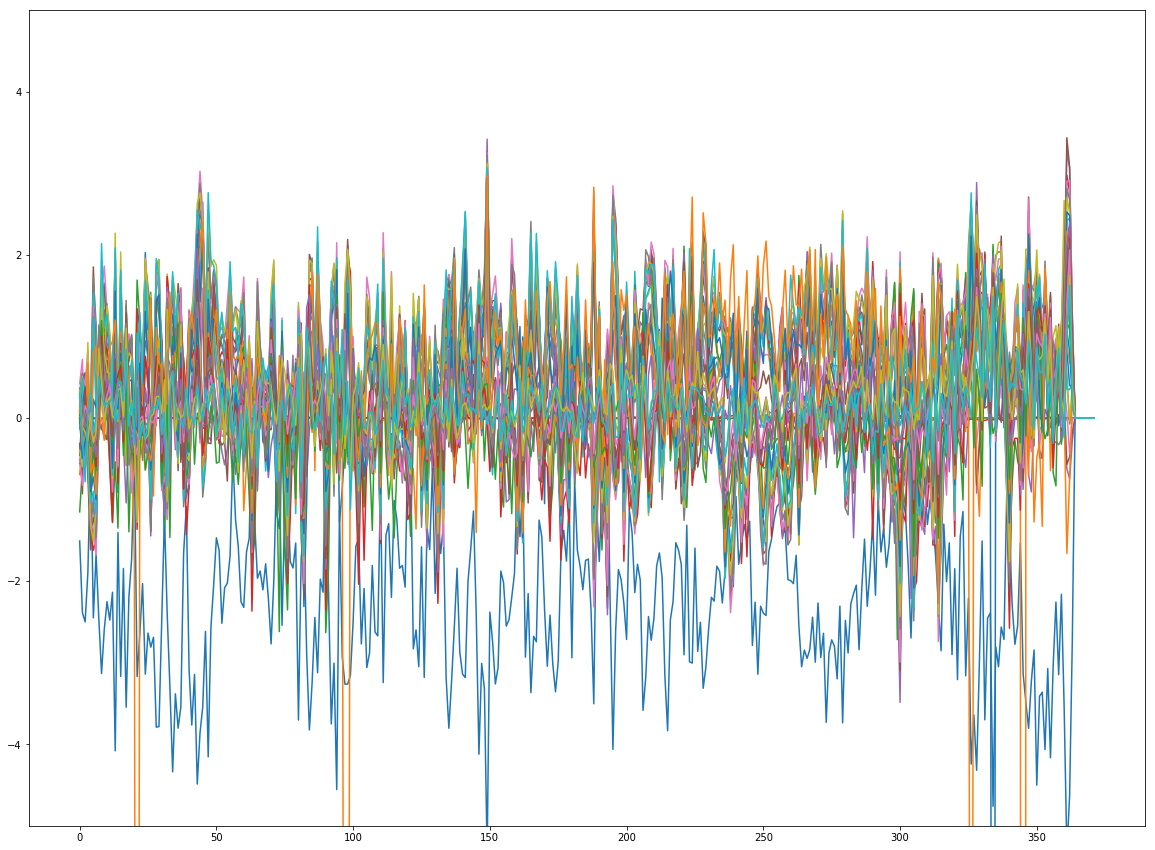

In [9]:
plt.figure(figsize=(20,15))

plt.ylim((-5,5))
for i in range(all_params.shape[1]):
    plt.plot(all_params[:, i])

Tau_inv_std = pd.Series(np.abs(all_diffs/43800)).quantile(0.99)#np.max(np.abs(all_diffs/43800))
Bo_std = np.std(all_params.flatten())

In [10]:
Tau_inv_std


4.956843223507737e-05

In [11]:
Bo_std

1.318116432033688

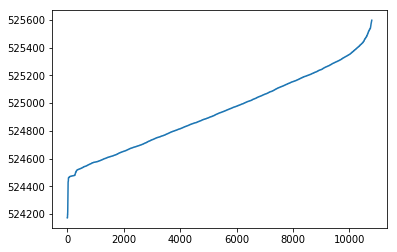

In [12]:
plt.plot(first_df.time)

In [13]:
sums = X.sum(axis=0)
for i in range(len(sums)):
    for j in range(i+1, len(sums)):
        if sums.iloc[i] == sums.iloc[j]:
            print(sums.index.values[i], sums.iloc[i])
            print(sums.index.values[j], sums.iloc[j])
            print(X.loc[:, sums.index.values[i]].equals(X.loc[:, sums.index.values[j]]))
            print("###########################")

CRS_DEP_TIME_BLK_1400-1459 668.0
CRS_DEP_TIME_BLK_1500-1559 668.0
False
###########################


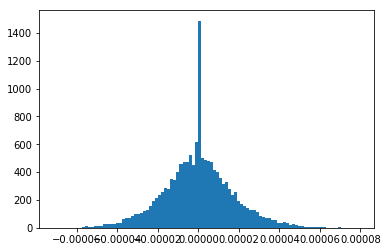

In [14]:
index = np.abs(all_diffs)/43800 < 0.0001
_=plt.hist(all_diffs[index]/43800, 100)

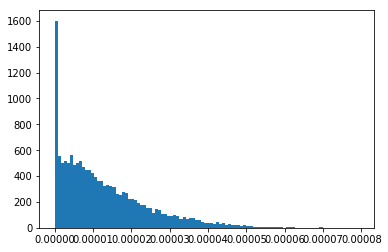

In [15]:
index = np.abs(all_diffs)/43800 < 0.0001
_=plt.hist(np.abs(all_diffs[index])/43800, 100)

In [16]:
np.max(np.abs(all_diffs/43800))

0.0026300175505785833

In [17]:
pd.Series(np.abs(all_diffs/43800)).quantile(0.99)

4.956843223507737e-05

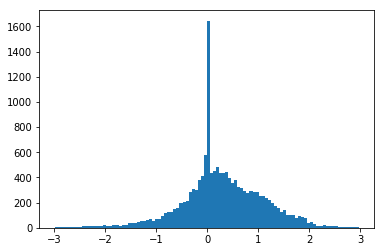

In [18]:
flat_params = all_params.flatten()
_=plt.hist(flat_params[np.abs(flat_params)<3], 100)

In [19]:
np.std(flat_params[np.abs(flat_params)<3])

0.8127597440769186